### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Function to Read and Load .cfile Data

In [2]:
def getData(cfileName):
    """
    Given a name of a *.cfile, this function extracts the interleaved
    Inphase-Quadrature data samples and convert it into a numpy array of complex
    data elements. *.cfile format has interleaved I and Q samples where each sample
    is a float32 type. GNURadio Companion (GRC) scripts output data into a file
    though a file sink block in this format.
    Read more in SDR data types: https://github.com/miek/inspectrum
    """
    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")
    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

### Reading and Loading a .cfile to Numpy Array

In [3]:
data = getData("/home/asanka/Desktop/my-data.cfile")

### Plotting Power Spectral Density (PSD)

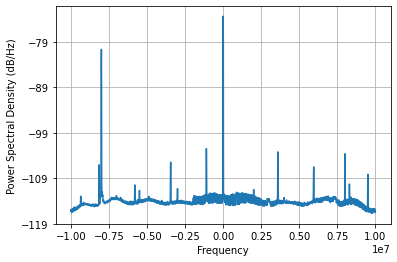

In [5]:
fig = plt.figure()
plt.psd(data, NFFT=2048, Fs=20e6)
plt.show()

### Plotting Spectrogram

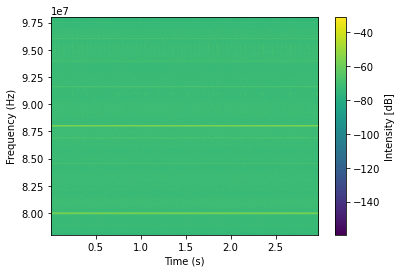

In [8]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(data, NFFT=1024, Fs=20e6, Fc=88e6, mode='magnitude')
fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

### Deleting Variable to Save Memory

In [9]:
del data